In [2]:
import pandas as pd
df0 = pd.read_csv (r'/home/yupaporn/codes/USAI/detail1_651.csv')
print(df0 .shape)
df01 = df0[(df0['Path Crop']!='None' )&(df0['Path Crop']!='Nan')]
dataframe = df01
print(dataframe.shape)
print('Normal: ',dataframe[dataframe['Class']=='Normal'].shape)
print('Abnormal: ',dataframe[dataframe['Class']=='Abnormal'].shape)
dataframe.head(5)

(6627, 11)
(6550, 11)
Normal:  (4576, 11)
Abnormal:  (1974, 11)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views
0,0,0,0,15,P3,P31,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B
1,1,1,1,42,P5,P52,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-C
2,2,2,2,22,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A
3,3,3,3,25,P4,P41,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B
4,4,4,4,40,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A


In [3]:

print(set(dataframe['Case']))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [4]:

def random(caselist ,seed, num_fold):
    import random 
    import copy
    caselist1 = copy.deepcopy(caselist)
#     print ("Original list: ", caselist1 ,'\n','\n')
    random.seed(seed) 
    random.shuffle(caselist1)
#     print("reshuffled list ", caselist1,'\n','\n')
    caselist_new = caselist1

    import math
    seg_length = math.ceil(len(caselist1)/num_fold)
#     print(int('\n','',seg_length))
    outlist = [caselist1[x:x+int(seg_length)] for x in range(0,len(caselist1),int(seg_length))]
#     print('Case Number Size :',len(caselist1))
#     print('Number fold :',num_fold)
    for i in range(0,num_fold) :
        print('\n','fold '+str(i+1)+':',len(outlist[i]))
  
    return outlist
    
# a = random(caselist, 4 ,2)

def n_fold_add(data, a):
    #number fold
    k = len(a)
    foldlist = list()
    for m in range(0,k):
        for n in a[m]:
            bb = m+1
            foldlist.append(bb)  

    #caselist after random
    nfold = len(a)
    case = list()
    for i in range(0,nfold):
        fold1 = a[i]
        for j in fold1:
            case.append(j)

    #dataframe
    df_fold = pd.DataFrame(list(zip(case, foldlist)), columns =['Case', 'fold']) 
    data_train = pd.merge(data , df_fold , on=['Case'])
#     os.chdir('/home/yupaporn/codes/USAI')
#     df_new.to_csv('Test_set_301-350.csv')
    return data_train

# n_fold_add(abn_p1, a)

In [5]:
dataframe

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views
0,0,0,0,15,P3,P31,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B
1,1,1,1,42,P5,P52,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-C
2,2,2,2,22,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A
3,3,3,3,25,P4,P41,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B
4,4,4,4,40,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A
...,...,...,...,...,...,...,...,...,...,...,...
6622,6622,6622,6622,518,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D
6623,6623,6623,6623,522,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D
6624,6624,6624,6624,523,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D
6625,6625,6625,6625,550,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D


In [6]:
# a = dataframe[dataframe['Case']==1]
Abnormal =dataframe[dataframe['Class']=='Abnormal']
Normal = dataframe[dataframe['Class']=='Normal']
print('Total : ',len(dataframe))
print('Abnormal : ',len(Abnormal))
print('Normal : ',len(Normal))

Total :  6550
Abnormal :  1974
Normal :  4576


# Abnormal

In [7]:
#จำนวนรูปภาพตามเคส
caseabn = Abnormal[["Case", "Sub_class"]].groupby("Case").count()
caseabn

,Sub_class
Case,
1,36
2,34
3,27
4,26
5,29
...,...
154,3
155,3
156,4


In [8]:
#จำนวนรูปภาพตามเคส
case = Abnormal[["Case", "Sub_class"]].groupby("Case").count()
case=case.reset_index()
case.groupby('Sub_class').count()

,Case
Sub_class,
1,17
2,4
3,10
4,11
5,4
6,14
7,12
8,11
9,4


In [9]:
#สร้าง list เก็บจำนวนรูปในแต่ละเคส
no =Abnormal[["Case", "Sub_class"]].groupby("Case").count()
nolist = list()
import numpy as np
noo = np.array(no)
for i in range(0,len(case)):
    nolist.append(noo[i][0])
no = set(nolist)

#จำนวนรูปในเเต่ละเคส
import numpy as np
caselist = list()
for j in no:
    no1 = [Abnormal[["Case", "Sub_class"]].groupby("Case").count() == j]
    noo1 = np.array(no1)
    for i in range(0,len(case)):
        if noo1[0][i][0] != False:
            caselist.append({'Case':i+1,'Count':j})

In [10]:
casedf = pd.DataFrame(caselist)
print(len(set(casedf['Case'])))
print(set(casedf['Case']))

158
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158}


In [11]:
casedf.head(5)

,Case,Count
0,113,1
1,114,1
2,115,1
3,116,1
4,117,1


In [12]:
casedf.head(5)
#Show Case
caselis = casedf['Case'].tolist()
count = casedf['Count'].tolist()
for j in no:
    print('Count = ',j)
    for i in range(0,len(casedf)):
        if count[i] == j:
            print(caselis[i])

Count =  1
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
157
158
Count =  2
110
111
112
145
Count =  3
101
103
104
107
147
149
150
151
154
155
Count =  4
102
105
141
142
143
144
146
148
152
153
156
Count =  5
72
99
106
108
Count =  6
66
67
68
69
70
77
82
83
85
88
89
97
100
138
Count =  7
61
62
80
86
90
91
93
94
96
98
139
140
Count =  8
58
59
64
74
75
76
78
81
84
92
137
Count =  9
57
73
79
109
Count =  10
65
71
95
Count =  11
55
60
63
87
136
Count =  12
52
54
56
135
Count =  13
53
133
134
Count =  14
128
129
130
131
132
Count =  16
47
50
Count =  17
48
Count =  18
49
Count =  19
42
51
Count =  20
43
46
Count =  21
36
Count =  22
32
40
41
44
45
Count =  23
34
Count =  24
28
38
Count =  25
25
33
Count =  26
4
9
27
29
35
37
Count =  27
3
7
13
19
20
Count =  28
6
8
16
18
30
39
Count =  29
5
11
21
24
26
31
Count =  30
10
12
17
Count =  31
23
Count =  33
14
22
Count =  34
2
15
Count =  36
1


In [13]:
fold = pd.read_csv (r'/home/yupaporn/codes/USAI/fold.csv')

In [14]:
fold.rename(columns={'case':'Case'}, inplace=True)

In [15]:
data = pd.merge(Abnormal , fold , on=['Case'])

In [16]:
#เช็ค Case, Abs Position, abn number
for j in range(0,10):
    j = j+1
    print('Fold =', j)
    fold1 = data[data['fold']==j]
    print('Abnormal : ',len(fold1))
    print('Abs Position : ',set(fold1['Abs Position']))
    print('Case : ',set(fold1['Case']),'\n')

Fold = 1
Abnormal :  198
Abs Position :  {'P1', 'P7', 'P2', 'P5', 'P4', 'P6', 'P3'}
Case :  {1, 97, 100, 90, 101, 41, 107, 76, 47, 113, 50, 54, 58, 29, 30} 

Fold = 2
Abnormal :  197
Abs Position :  {'P1', 'P7', 'P2', 'P5', 'P6', 'P4', 'P3'}
Case :  {128, 2, 103, 40, 59, 91, 138, 78, 48, 18, 114, 116, 115, 147, 56, 89, 27} 

Fold = 3
Abnormal :  197
Abs Position :  {'P1', 'P7', 'P2', 'P5', 'P6', 'P4', 'P3'}
Case :  {32, 64, 129, 135, 72, 9, 104, 15, 16, 49, 81, 117, 118, 119, 88, 149, 93} 

Fold = 4
Abnormal :  197
Abs Position :  {'P1', 'P7', 'P2', 'P5', 'P6', 'P4', 'P3'}
Case :  {34, 99, 4, 130, 8, 42, 74, 14, 84, 85, 150, 55, 120, 121, 156, 94} 

Fold = 5
Abnormal :  198
Abs Position :  {'P1', 'P7', 'P2', 'P5', 'P6', 'P4', 'P3'}
Case :  {96, 131, 38, 6, 106, 75, 92, 51, 20, 83, 22, 151, 153, 122, 60} 

Fold = 6
Abnormal :  198
Abs Position :  {'P1', 'P7', 'P2', 'P5', 'P6', 'P4', 'P3'}
Case :  {98, 132, 5, 137, 43, 108, 109, 82, 19, 23, 152, 154, 28, 63} 

Fold = 7
Abnormal :  197
Ab

In [17]:
data.head(5)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold
0,0,0,0,15,P3,P31,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3
1,102,102,102,15,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,3
2,247,247,247,15,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,3
3,259,259,259,15,P4,P42,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3
4,278,278,278,15,P4,P41,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3


In [18]:
#เก็บจำนวนมุมในเเต่ละ fold
abnview1 = list()
abnview2 = list()
abnview3 = list()
abnview4 = list()
abnview5 = list()
abnview6 = list()
abnview7 = list()
# abnview8 = list()
for j in range(0,10):
    j = j+1
    fold = data[data['fold']==j]
    abn1 = fold[fold['Abs Position']=='P1'].count()[0]
    abn2 = fold[fold['Abs Position']=='P2'].count()[0]
    abn3 = fold[fold['Abs Position']=='P3'].count()[0]
    abn4 = fold[fold['Abs Position']=='P4'].count()[0]
    abn5 = fold[fold['Abs Position']=='P5'].count()[0]
    abn6 = fold[fold['Abs Position']=='P6'].count()[0]
    abn7 = fold[fold['Abs Position']=='P7'].count()[0]
#     abn8 = fold[fold['Abs Position']=='P8'].count()[0]
    abnview1.append(abn1)
    abnview2.append(abn2)
    abnview3.append(abn3)
    abnview4.append(abn4)
    abnview5.append(abn5)
    abnview6.append(abn6)
    abnview7.append(abn7)
#     abnview8.append(abn8)

In [19]:
#เก็บจำนวน case ในเเต่ละ fold
caselist=list()
for j in range(0,10):
    j = j+1
    fold = data[data['fold']==j]
    case =len(set(fold['Case']))
    caselist.append(case)

P1 [33, 34, 32, 33, 35, 36, 35, 33, 37, 32]
P2 [26, 24, 22, 20, 25, 25, 27, 25, 25, 25]
P3 [35, 32, 36, 32, 33, 29, 28, 30, 35, 35]
P4 [30, 38, 32, 38, 34, 40, 40, 39, 30, 29]
P5 [48, 45, 43, 43, 44, 46, 43, 45, 43, 50]
P6 [19, 19, 22, 21, 19, 18, 18, 21, 22, 19]
P7 [7, 5, 10, 10, 8, 4, 6, 4, 5, 8]


Text(0, 0.5, 'Recall Scores')

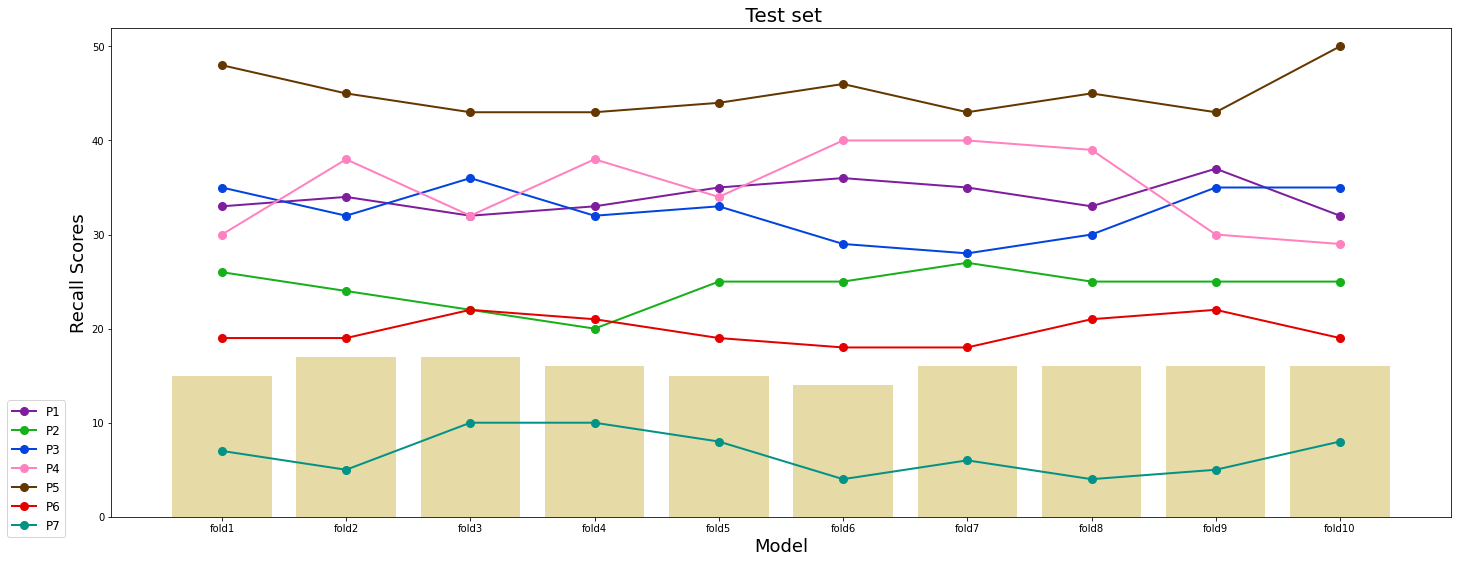

In [20]:
print('P1',abnview1)
print('P2',abnview2)
print('P3',abnview3)
print('P4',abnview4)
print('P5',abnview5)
print('P6',abnview6)
print('P7',abnview7)

import matplotlib.pyplot as plt
import numpy as np
from pylab import plot, show, title, xlabel, ylabel
from pylab import legend
from pylab import axis
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(24, 9))
# using some dummy data for this example
x= ['fold1','fold2','fold3','fold4','fold5','fold6','fold7','fold8','fold9','fold10']
# setting x and y axis range 
plt.ylim(0.0,52.0) 
# 'bo-' means blue color, round points, solid lines
plt.plot(x,abnview1,color='#7e1e9c', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#7e1e9c', markersize=8)
plt.plot(x,abnview2,color='#15b01a', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#15b01a', markersize=8)
plt.plot(x,abnview3,color='#0343df', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#0343df', markersize=8)
plt.plot(x,abnview4,color='#ff81c0', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#ff81c0', markersize=8)
plt.plot(x,abnview5,color='#653700', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#653700', markersize=8)
plt.plot(x,abnview6,color='#e50000', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#e50000', markersize=8)
plt.plot(x,abnview7,color='#029386', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#029386', markersize=8)
plt.bar(x,caselist,color='#e6daa6')
# Apply the legend to tell the graphs apart
legend(['P1','P2','P3','P4','P5','P6','P7'], bbox_to_anchor=(- 0.03,0.25),fontsize=12)
# Apply the TITLE, X-axis and Y-axis label
title(' Test set',fontsize=20)
xlabel('Model',fontsize=18)
ylabel('Recall Scores',fontsize=18)

In [21]:
#เช็ค subclass Abnormal
for j in range(0,10):
    j = j+1
    print('Fold =', j)
    fold1 = data[data['fold']==j]
    print('Sub_class : ',set(fold1['Sub_class']))

Fold = 1
Sub_class :  {'AB01', 'AB06', 'AB07', 'AB11', 'AB10', 'AB081', 'AB03', 'AB02', 'AB05', 'AB083', 'AB082', 'AB09', 'AB04'}
Fold = 2
Sub_class :  {'AB01', 'AB06', 'AB07', 'AB11', 'AB10', 'AB081', 'AB03', 'AB02', 'AB05', 'AB083', 'AB082', 'AB09', 'AB04'}
Fold = 3
Sub_class :  {'AB01', 'AB06', 'AB07', 'AB11', 'AB10', 'AB081', 'AB03', 'AB02', 'AB05', 'AB083', 'AB082', 'AB09', 'AB04'}
Fold = 4
Sub_class :  {'AB01', 'AB06', 'AB07', 'AB11', 'AB10', 'AB081', 'AB03', 'AB02', 'AB05', 'AB083', 'AB082', 'AB09', 'AB04'}
Fold = 5
Sub_class :  {'AB01', 'AB06', 'AB07', 'AB11', 'AB10', 'AB081', 'AB03', 'AB02', 'AB05', 'AB083', 'AB082', 'AB09', 'AB04'}
Fold = 6
Sub_class :  {'AB01', 'AB06', 'AB07', 'AB11', 'AB10', 'AB081', 'AB03', 'AB02', 'AB05', 'AB083', 'AB082', 'AB09', 'AB04'}
Fold = 7
Sub_class :  {'AB01', 'AB06', 'AB07', 'AB11', 'AB10', 'AB081', 'AB03', 'AB02', 'AB05', 'AB083', 'AB082', 'AB09', 'AB04'}
Fold = 8
Sub_class :  {'AB01', 'AB06', 'AB07', 'AB11', 'AB10', 'AB081', 'AB03', 'AB02', 'A

In [22]:
#เก็บจำนวนมุมในเเต่ละ fold
abnview1 = list()
abnview2 = list()
abnview3 = list()
abnview4 = list()
abnview5 = list()
abnview6 = list()
abnview7 = list()
abnview81 = list()
abnview82 = list()
abnview83 = list()
abnview9 = list()
abnview10 = list()
abnview11 = list()
# abnview8 = list()
for j in range(0,10):
    j = j+1
    fold = data[data['fold']==j]
    abn1 = fold[fold['Sub_class']=='AB01'].count()[0]
    abn2 = fold[fold['Sub_class']=='AB02'].count()[0]
    abn3 = fold[fold['Sub_class']=='AB03'].count()[0]
    abn4 = fold[fold['Sub_class']=='AB04'].count()[0]
    abn5 = fold[fold['Sub_class']=='AB05'].count()[0]
    abn6 = fold[fold['Sub_class']=='AB06'].count()[0]
    abn7 = fold[fold['Sub_class']=='AB07'].count()[0]
    abn81 = fold[fold['Sub_class']=='AB081'].count()[0]
    abn82 = fold[fold['Sub_class']=='AB082'].count()[0]
    abn83 = fold[fold['Sub_class']=='AB083'].count()[0]
    abn9 = fold[fold['Sub_class']=='AB09'].count()[0]
    abn10 = fold[fold['Sub_class']=='AB10'].count()[0]
    abn11 = fold[fold['Sub_class']=='AB11'].count()[0]
    abnview1.append(abn1)
    abnview2.append(abn2)
    abnview3.append(abn3)
    abnview4.append(abn4)
    abnview5.append(abn5)
    abnview6.append(abn6)
    abnview7.append(abn7)
    abnview81.append(abn81)
    abnview82.append(abn82)
    abnview83.append(abn83)
    abnview9.append(abn9)
    abnview10.append(abn10)
    abnview11.append(abn11)

In [23]:
print('AB01',abnview1)
print('AB02',abnview2)
print('AB03',abnview3)
print('AB04',abnview4)
print('AB05',abnview5)
print('AB06',abnview6)
print('AB07',abnview7)
print('AB081',abnview81)
print('AB082',abnview82)
print('AB083',abnview83)
print('AB09',abnview9)
print('AB10',abnview10)
print('AB11',abnview11)

AB01 [37, 37, 38, 32, 42, 35, 36, 39, 34, 39]
AB02 [34, 31, 33, 36, 35, 36, 39, 29, 25, 35]
AB03 [8, 10, 10, 8, 11, 14, 8, 14, 14, 6]
AB04 [24, 18, 21, 25, 19, 23, 26, 21, 21, 23]
AB05 [14, 17, 12, 9, 14, 15, 9, 12, 16, 9]
AB06 [11, 8, 7, 8, 8, 9, 10, 7, 8, 9]
AB07 [13, 8, 10, 9, 8, 7, 9, 9, 12, 10]
AB081 [15, 17, 17, 16, 15, 13, 17, 15, 15, 16]
AB082 [9, 15, 12, 17, 13, 13, 12, 15, 16, 15]
AB083 [5, 5, 6, 6, 5, 6, 4, 7, 5, 5]
AB09 [14, 12, 12, 13, 12, 12, 12, 12, 12, 13]
AB10 [4, 5, 6, 6, 5, 6, 4, 6, 6, 5]
AB11 [10, 14, 13, 12, 11, 9, 11, 11, 13, 13]


AB01 [37, 37, 38, 32, 42, 35, 36, 39, 34, 39]
AB02 [34, 31, 33, 36, 35, 36, 39, 29, 25, 35]
AB03 [8, 10, 10, 8, 11, 14, 8, 14, 14, 6]
AB04 [24, 18, 21, 25, 19, 23, 26, 21, 21, 23]
AB05 [14, 17, 12, 9, 14, 15, 9, 12, 16, 9]
AB06 [11, 8, 7, 8, 8, 9, 10, 7, 8, 9]
AB07 [13, 8, 10, 9, 8, 7, 9, 9, 12, 10]
AB081 [15, 17, 17, 16, 15, 13, 17, 15, 15, 16]
AB082 [9, 15, 12, 17, 13, 13, 12, 15, 16, 15]
AB083 [5, 5, 6, 6, 5, 6, 4, 7, 5, 5]
AB09 [14, 12, 12, 13, 12, 12, 12, 12, 12, 13]
AB10 [4, 5, 6, 6, 5, 6, 4, 6, 6, 5]
AB11 [10, 14, 13, 12, 11, 9, 11, 11, 13, 13]


Text(0, 0.5, 'Number')

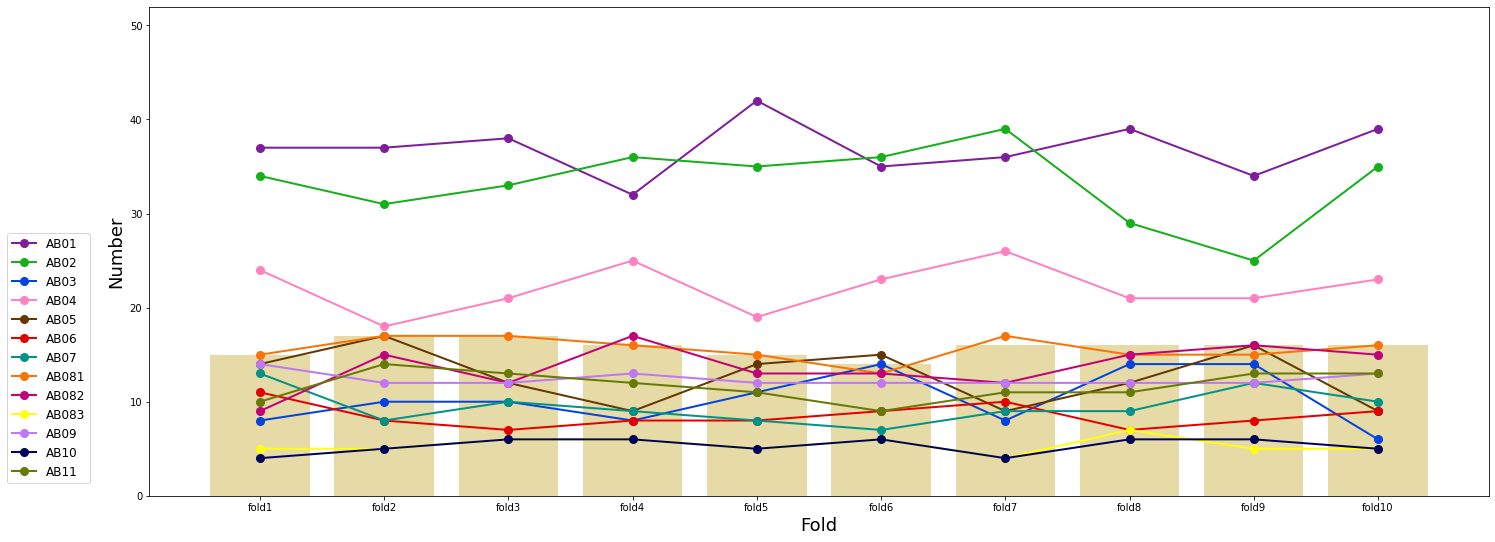

In [24]:
print('AB01',abnview1)
print('AB02',abnview2)
print('AB03',abnview3)
print('AB04',abnview4)
print('AB05',abnview5)
print('AB06',abnview6)
print('AB07',abnview7)
print('AB081',abnview81)
print('AB082',abnview82)
print('AB083',abnview83)
print('AB09',abnview9)
print('AB10',abnview10)
print('AB11',abnview11)

import matplotlib.pyplot as plt
import numpy as np
from pylab import plot, show, title, xlabel, ylabel
from pylab import legend
from pylab import axis
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(24, 9))
# using some dummy data for this example
x= ['fold1','fold2','fold3','fold4','fold5','fold6','fold7','fold8','fold9','fold10']
# setting x and y axis range 
plt.ylim(0.0,52.0) 
# 'bo-' means blue color, round points, solid lines
plt.plot(x,abnview1,color='#7e1e9c', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#7e1e9c', markersize=8)
plt.plot(x,abnview2,color='#15b01a', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#15b01a', markersize=8)
plt.plot(x,abnview3,color='#0343df', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#0343df', markersize=8)
plt.plot(x,abnview4,color='#ff81c0', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#ff81c0', markersize=8)
plt.plot(x,abnview5,color='#653700', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#653700', markersize=8)
plt.plot(x,abnview6,color='#e50000', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#e50000', markersize=8)
plt.plot(x,abnview7,color='#029386', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#029386', markersize=8)
plt.plot(x,abnview81,color='#f97306', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#f97306', markersize=8)
plt.plot(x,abnview82,color='#c20078', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#c20078', markersize=8)
plt.plot(x,abnview83,color='#ffff14', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#ffff14', markersize=8)
plt.plot(x,abnview9,color='#bf77f6', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#bf77f6', markersize=8)
plt.plot(x,abnview10,color='#00035b', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#00035b', markersize=8)
plt.plot(x,abnview11,color='#677a04', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#677a04', markersize=8)
plt.bar(x,caselist,color='#e6daa6')
# Apply the legend to tell the graphs apart
legend(['AB01','AB02','AB03','AB04','AB05','AB06','AB07','AB081','AB082','AB083','AB09','AB10','AB11'], bbox_to_anchor=(- 0.04,0.55),fontsize=12)
# Apply the TITLE, X-axis and Y-axis label
# title(' Test set',fontsize=20)
xlabel('Fold',fontsize=18)
ylabel('Number',fontsize=18)

In [25]:
data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold
0,0,0,0,15,P3,P31,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3
1,102,102,102,15,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,3
2,247,247,247,15,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,3
3,259,259,259,15,P4,P42,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3
4,278,278,278,15,P4,P41,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1969,6285,6285,6285,134,P6,P61,Abnormal,AB09,/media/tohn/HDD/VISION_dataset/USAI/ABNORMAL J...,/media/tohn/HDD/VISION_dataset/USAI/ABNORMAL J...,FP-C,9
1970,6296,6296,6296,134,P6,P61,Abnormal,AB10,/media/tohn/HDD/VISION_dataset/USAI/ABNORMAL J...,/media/tohn/HDD/VISION_dataset/USAI/ABNORMAL J...,FP-C,9
1971,6312,6312,6312,134,P5,P52,Abnormal,AB11,/media/tohn/HDD/VISION_dataset/USAI/ABNORMAL J...,/media/tohn/HDD/VISION_dataset/USAI/ABNORMAL J...,FP-C,9
1972,6247,6247,6247,157,P2,P2,Abnormal,AB04,/media/tohn/HDD/VISION_dataset/USAI/ABNORMAL J...,/media/tohn/HDD/VISION_dataset/USAI/ABNORMAL J...,FP-A,9


# Normal

In [26]:
# a = dataframe[dataframe['Case']==1]
Abnormal =dataframe[dataframe['Class']=='Abnormal']
Normal = dataframe[dataframe['Class']=='Normal']
print('Total : ',len(dataframe))
print('Abnormal : ',len(Abnormal))
print('Normal : ',len(Normal))

Total :  6550
Abnormal :  1974
Normal :  4576


In [27]:
#จำนวนรูปภาพตามเคส
caseabn = Normal[["Case", "Sub_class"]].groupby("Case").count()
caseabn

,Sub_class
Case,
1,13
2,12
3,12
4,12
5,12
...,...
647,1
648,1
649,1


In [28]:
#จำนวนรูปภาพตามเคส
case = Normal[["Case", "Sub_class"]].groupby("Case").count()
case=case.reset_index()
case.groupby('Sub_class').count()

,Case
Sub_class,
1,282
2,16
6,1
7,10
8,1
9,1
11,35
12,170
13,82


In [29]:
#สร้าง list เก็บจำนวนรูปในแต่ละเคส
no =Normal[["Case", "Sub_class"]].groupby("Case").count()
nolist = list()
import numpy as np
noo = np.array(no)
for i in range(0,len(case)):
    nolist.append(noo[i][0])
no = set(nolist)

#จำนวนรูปในเเต่ละเคส
import numpy as np
caselist = list()
numcase = case['Case'].tolist()
for j in no:
    no1 = [Normal[["Case", "Sub_class"]].groupby("Case").count() == j]
    noo1 = np.array(no1)
    for i in range(0,len(case)):
        if noo1[0][i][0] != False:
            caselist.append({'Case':numcase[i],'Count':j})

In [30]:
casedf = pd.DataFrame(caselist)
print(len(set(casedf['Case'])))
print(set(casedf['Case']))

645
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

In [31]:
case.groupby('Sub_class').count()

,Case
Sub_class,
1,282
2,16
6,1
7,10
8,1
9,1
11,35
12,170
13,82


In [32]:
num1 = casedf[casedf['Count']==1]['Case'].tolist()
num2 = casedf[casedf['Count']==2]['Case'].tolist()
num6 = casedf[casedf['Count']==6]['Case'].tolist()
num7 = casedf[casedf['Count']==7]['Case'].tolist()
num8 = casedf[casedf['Count']==8]['Case'].tolist()
num9 = casedf[casedf['Count']==9]['Case'].tolist()
num11 = casedf[casedf['Count']==11]['Case'].tolist()
num12 = casedf[casedf['Count']==12]['Case'].tolist()
num13 = casedf[casedf['Count']==13]['Case'].tolist()
num14 = casedf[casedf['Count']==14]['Case'].tolist()
num15 = casedf[casedf['Count']==15]['Case'].tolist()
num25 = casedf[casedf['Count']==25]['Case'].tolist()

In [33]:
print(set(casedf['Case']))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [34]:
#Show Case
caselis = casedf['Case'].tolist()
count = casedf['Count'].tolist()
for j in no:
    print('Count = ',j)
    for i in range(0,len(casedf)):
        if count[i] == j:
            print(caselis[i])

Count =  1
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
590
591
592
593
594
595
596
597
598
599
601
602
603
604
605
606
607
608
609
610
611
612
6

In [35]:
fold02 = pd.read_csv (r'/home/yupaporn/codes/USAI/fold02.csv')
data2 = pd.merge(Normal , fold02 , on=['Case'])

In [36]:
print(len(set(Normal['Case'])))
print(set(Normal['Case']))

645
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

In [37]:
# print(len(set(fold01['Case'])))
# print(set(fold01['Case']))

In [38]:
set(Normal['Case']).difference(set(fold02['Case']))

set()

In [39]:
set(fold02['Case']).difference(set(Normal['Case']))

set()

In [40]:
#เช็ค Case, Abs Position, abn number
for j in range(0,10):
    j = j+1
    print('Fold =', j)
    fold1 = data2[data2['fold']==j]
    print('Abnormal : ',len(fold1))
    print('Abs Position : ',set(fold1['Abs Position']))
    print('Case : ',set(fold1['Case']),'\n')

Fold = 1
Abnormal :  472
Abs Position :  {'P1', 'P7', 'P8', 'P2', 'P5', 'P6', 'P4', 'P3'}
Case :  {1, 2, 385, 4, 134, 135, 8, 145, 401, 19, 533, 150, 25, 283, 284, 541, 35, 37, 165, 166, 556, 431, 306, 307, 564, 55, 185, 186, 441, 572, 577, 70, 71, 326, 585, 593, 338, 599, 89, 218, 91, 348, 601, 607, 609, 227, 230, 103, 104, 358, 615, 621, 378, 240, 368, 114, 626, 633, 250, 635} 

Fold = 2
Abnormal :  458
Abs Position :  {'P1', 'P7', 'P8', 'P2', 'P5', 'P6', 'P4', 'P3'}
Case :  {386, 3, 259, 5, 133, 7, 136, 9, 516, 396, 269, 146, 402, 20, 281, 412, 29, 285, 36, 164, 38, 167, 422, 432, 305, 308, 56, 184, 442, 187, 443, 444, 69, 325, 453, 72, 462, 343, 88, 217, 471, 92, 349, 480, 228, 102, 231, 359, 105, 489, 624, 241, 369, 115, 498, 507, 379} 

Fold = 3
Abnormal :  456
Abs Position :  {'P1', 'P7', 'P8', 'P2', 'P5', 'P6', 'P4', 'P3'}
Case :  {258, 387, 132, 517, 6, 137, 10, 395, 397, 270, 525, 147, 403, 22, 280, 411, 413, 31, 287, 163, 421, 549, 423, 168, 41, 298, 557, 304, 433, 309, 565,

In [41]:
#เก็บจำนวนมุมในเเต่ละ fold
abnview1 = list()
abnview2 = list()
abnview3 = list()
abnview4 = list()
abnview5 = list()
abnview6 = list()
abnview7 = list()
abnview8 = list()
for j in range(0,10):
    j = j+1
    fold = data[data['fold']==j]
    abn1 = fold[fold['Abs Position']=='P1'].count()[0]
    abn2 = fold[fold['Abs Position']=='P2'].count()[0]
    abn3 = fold[fold['Abs Position']=='P3'].count()[0]
    abn4 = fold[fold['Abs Position']=='P4'].count()[0]
    abn5 = fold[fold['Abs Position']=='P5'].count()[0]
    abn6 = fold[fold['Abs Position']=='P6'].count()[0]
    abn7 = fold[fold['Abs Position']=='P7'].count()[0]
    abn8 = fold[fold['Abs Position']=='P8'].count()[0]
    abnview1.append(abn1)
    abnview2.append(abn2)
    abnview3.append(abn3)
    abnview4.append(abn4)
    abnview5.append(abn5)
    abnview6.append(abn6)
    abnview7.append(abn7)
    abnview8.append(abn8)

In [42]:
#เก็บจำนวน case ในเเต่ละ fold
caselist=list()
for j in range(0,10):
    j = j+1
    fold = data2[data2['fold']==j]
    case =len(set(fold['Case']))
    caselist.append(case)

P1 [33, 34, 32, 33, 35, 36, 35, 33, 37, 32]
P2 [26, 24, 22, 20, 25, 25, 27, 25, 25, 25]
P3 [35, 32, 36, 32, 33, 29, 28, 30, 35, 35]
P4 [30, 38, 32, 38, 34, 40, 40, 39, 30, 29]
P5 [48, 45, 43, 43, 44, 46, 43, 45, 43, 50]
P6 [19, 19, 22, 21, 19, 18, 18, 21, 22, 19]
P7 [7, 5, 10, 10, 8, 4, 6, 4, 5, 8]
P8 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Text(0, 0.5, 'Number')

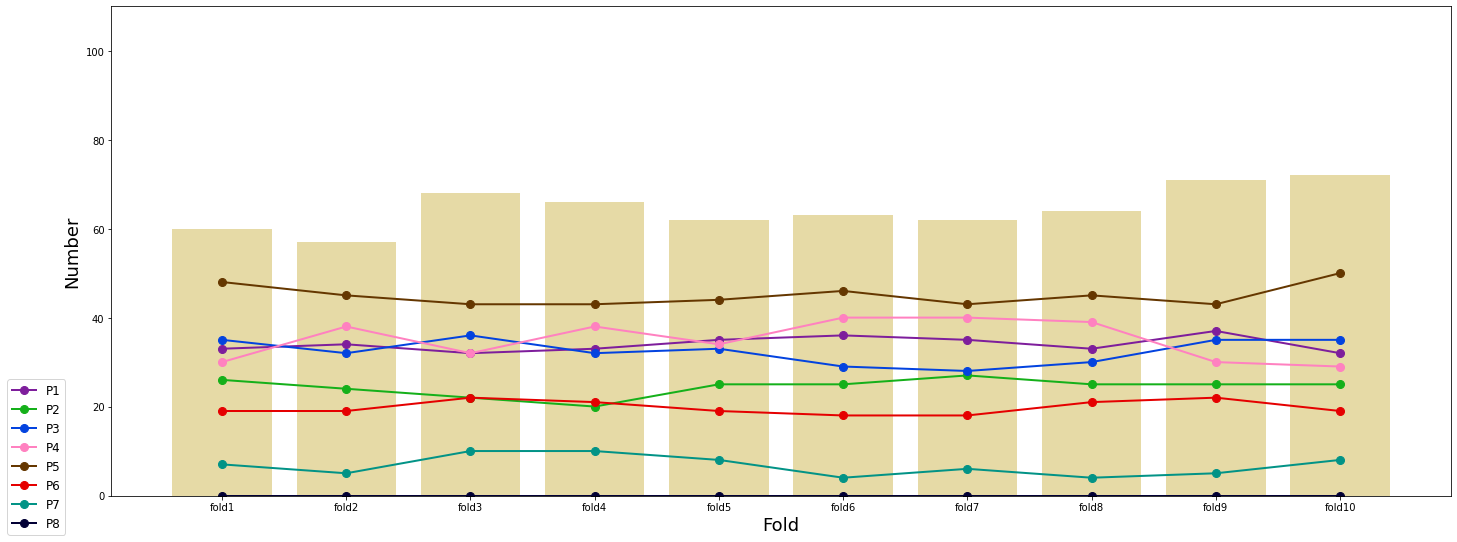

In [43]:
print('P1',abnview1)
print('P2',abnview2)
print('P3',abnview3)
print('P4',abnview4)
print('P5',abnview5)
print('P6',abnview6)
print('P7',abnview7)
print('P8',abnview8)

import matplotlib.pyplot as plt
import numpy as np
from pylab import plot, show, title, xlabel, ylabel
from pylab import legend
from pylab import axis
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(24, 9))
# using some dummy data for this example
x= ['fold1','fold2','fold3','fold4','fold5','fold6','fold7','fold8','fold9','fold10']
# setting x and y axis range 
plt.ylim(0.0,110.0) 
# 'bo-' means blue color, round points, solid lines
plt.plot(x,abnview1,color='#7e1e9c', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#7e1e9c', markersize=8)
plt.plot(x,abnview2,color='#15b01a', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#15b01a', markersize=8)
plt.plot(x,abnview3,color='#0343df', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#0343df', markersize=8)
plt.plot(x,abnview4,color='#ff81c0', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#ff81c0', markersize=8)
plt.plot(x,abnview5,color='#653700', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#653700', markersize=8)
plt.plot(x,abnview6,color='#e50000', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#e50000', markersize=8)
plt.plot(x,abnview7,color='#029386', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#029386', markersize=8)
plt.plot(x,abnview8,color='#020035', linestyle='-', linewidth = 2, marker='o', markerfacecolor='#020035', markersize=8)
plt.bar(x,caselist,color='#e6daa6')
# Apply the legend to tell the graphs apart
legend(['P1','P2','P3','P4','P5','P6','P7','P8'], bbox_to_anchor=(- 0.03,0.25),fontsize=12)
# Apply the TITLE, X-axis and Y-axis label
# title(' Test set',fontsize=20)
xlabel('Fold',fontsize=18)
ylabel('Number',fontsize=18)

In [44]:
data2

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold
0,1769,1769,1769,5,P1,P1,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,FP-A,2
1,1838,1838,1838,5,P2,P2,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,FP-A,2
2,1905,1905,1905,5,P3,P32,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,FP-B,2
3,1908,1908,1908,5,P3,P31,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,FP-B,2
4,2019,2019,2019,5,P4,P41,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,FP-B,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4571,6622,6622,6622,518,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,4
4572,6623,6623,6623,522,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,8
4573,6624,6624,6624,523,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,9
4574,6625,6625,6625,550,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,4


# SAVE .CSV file

In [49]:
dff= pd.concat([data, data2], ignore_index=True)
dff = dff.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'], axis=1)

In [50]:
# import os
# os.chdir( '/home/yupaporn/codes/USAI/')
# dff.to_csv('data_fold.csv')

# Spilt Train Test Validation

In [51]:
dff

,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold
0,15,P3,P31,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3
1,15,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,3
2,15,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,3
3,15,P4,P42,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3
4,15,P4,P41,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3
...,...,...,...,...,...,...,...,...,...
6545,518,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,4
6546,522,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,8
6547,523,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,9
6548,550,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,4


In [54]:
testdf = dff.loc[(dff['fold']==1) | (dff['fold']==2)]
testdf

,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold
111,40,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,2
112,40,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,2
113,40,P4,P41,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,2
114,40,P5,P51,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-C,2
115,40,P3,P31,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,2
...,...,...,...,...,...,...,...,...,...
6479,635,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,1
6492,609,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,1
6494,621,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,1
6517,556,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,1


In [55]:
validationdf = dff.loc[dff['fold']==3]
validationdf

,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold
0,15,P3,P31,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3
1,15,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,3
2,15,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,3
3,15,P4,P42,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3
4,15,P4,P41,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3
...,...,...,...,...,...,...,...,...,...
6477,613,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,3
6512,573,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,3
6532,499,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,3
6538,581,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,3


In [57]:
traindf = dff.loc[(dff['fold']!=1) & (dff['fold']!=2) &(dff['fold']!=3)]
traindf

,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold
34,42,P5,P52,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-C,4
35,42,P1,P1,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,4
36,42,P2,P2,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,4
37,42,P5,P51,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-C,4
38,42,P4,P42,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,4
...,...,...,...,...,...,...,...,...,...
6544,514,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,9
6545,518,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,4
6546,522,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,8
6547,523,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,9


In [59]:
# import os
# os.chdir( '/home/yupaporn/codes/USAI/')
# testdf.to_csv('testdf.csv')
# validationdf.to_csv('validationdf.csv')
# traindf.to_csv('traindf.csv')

# วิธีเก่า 
### จำนวน Case เท่าๆ กัน  /
### จำนวน มุม เท่าๆ กัน  /
### จำนวน Abn & Nor เท่าๆ กัน *ไม่ผ่าน

In [43]:
caselist1 = list(set(dataframe['Case']))
a1 = random(caselist1, 4 ,10) 
p1 =n_fold_add(dataframe, a1)


 fold 1: 65

 fold 2: 65

 fold 3: 65

 fold 4: 65

 fold 5: 65

 fold 6: 65

 fold 7: 65

 fold 8: 65

 fold 9: 65

 fold 10: 60


In [44]:
#เช็คมุม
a1 = p1[p1['fold']==1]
a2 = p1[p1['fold']==2]
a3 = p1[p1['fold']==3]
a4 = p1[p1['fold']==4]
a5 = p1[p1['fold']==5]
a6 = p1[p1['fold']==6]
a7 = p1[p1['fold']==7]
a8 = p1[p1['fold']==8]
a9 = p1[p1['fold']==9]
a10 = p1[p1['fold']==10]
print(set(a1['Abs Position']))
print(set(a2['Abs Position']))
print(set(a3['Abs Position']))
print(set(a4['Abs Position']))
print(set(a5['Abs Position']))
print(set(a6['Abs Position']))
print(set(a7['Abs Position']))
print(set(a8['Abs Position']))
print(set(a9['Abs Position']))
print(set(a10['Abs Position']))

{'P6', 'P5', 'P2', 'P3', 'P8', 'P4', 'P7', 'P1'}
{'P6', 'P5', 'P2', 'P3', 'P8', 'P4', 'P7', 'P1'}
{'P6', 'P5', 'P3', 'P2', 'P8', 'P4', 'P7', 'P1'}
{'P6', 'P5', 'P2', 'P3', 'P8', 'P4', 'P7', 'P1'}
{'P6', 'P5', 'P3', 'P2', 'P8', 'P4', 'P7', 'P1'}
{'P6', 'P5', 'P3', 'P2', 'P8', 'P4', 'P7', 'P1'}
{'P6', 'P5', 'P2', 'P3', 'P8', 'P4', 'P7', 'P1'}
{'P6', 'P5', 'P3', 'P2', 'P8', 'P4', 'P7', 'P1'}
{'P6', 'P5', 'P2', 'P3', 'P8', 'P4', 'P7', 'P1'}
{'P6', 'P5', 'P3', 'P2', 'P8', 'P4', 'P7', 'P1'}


In [45]:
#เช็คจำนว Abn&Nor
Abnormal = a1[a1['Class'] == 'Abnormal']
Normal = a1[a1['Class'] == 'Normal']
print('Total : ',len(a1))
print('Abnormal : ',len(Abnormal))
print('Normal : ',len(Normal))

Total :  699
Abnormal :  237
Normal :  462


In [46]:
Abnormal = a2[a2['Class'] == 'Abnormal']
Normal = a2[a2['Class'] == 'Normal']
print('Total : ',len(a1))
print('Abnormal : ',len(Abnormal))
print('Normal : ',len(Normal))

Total :  699
Abnormal :  150
Normal :  390


In [47]:
Abnormal = a3[a3['Class'] == 'Abnormal']
Normal = a3[a3['Class'] == 'Normal']
print('Total : ',len(a1))
print('Abnormal : ',len(Abnormal))
print('Normal : ',len(Normal))

Total :  699
Abnormal :  249
Normal :  407


In [48]:
Abnormal = a4[a4['Class'] == 'Abnormal']
Normal = a4[a4['Class'] == 'Normal']
print('Total : ',len(a1))
print('Abnormal : ',len(Abnormal))
print('Normal : ',len(Normal))

Total :  699
Abnormal :  107
Normal :  461


In [49]:
Abnormal = a5[a5['Class'] == 'Abnormal']
Normal = a5[a5['Class'] == 'Normal']
print('Total : ',len(a1))
print('Abnormal : ',len(Abnormal))
print('Normal : ',len(Normal))

Total :  699
Abnormal :  232
Normal :  413


In [50]:
Abnormal = a6[a6['Class'] == 'Abnormal']
Normal = a6[a6['Class'] == 'Normal']
print('Total : ',len(a1))
print('Abnormal : ',len(Abnormal))
print('Normal : ',len(Normal))

Total :  699
Abnormal :  274
Normal :  543


In [51]:
Abnormal = a7[a7['Class'] == 'Abnormal']
Normal = a7[a7['Class'] == 'Normal']
print('Total : ',len(a1))
print('Abnormal : ',len(Abnormal))
print('Normal : ',len(Normal))

Total :  699
Abnormal :  237
Normal :  375


In [52]:
Abnormal = a8[a8['Class'] == 'Abnormal']
Normal = a8[a8['Class'] == 'Normal']
print('Total : ',len(a1))
print('Abnormal : ',len(Abnormal))
print('Normal : ',len(Normal))

Total :  699
Abnormal :  168
Normal :  500


In [53]:
Abnormal = a9[a9['Class'] == 'Abnormal']
Normal = a9[a9['Class'] == 'Normal']
print('Total : ',len(a1))
print('Abnormal : ',len(Abnormal))
print('Normal : ',len(Normal))

Total :  699
Abnormal :  142
Normal :  496


In [54]:
Abnormal = a10[a10['Class'] == 'Abnormal']
Normal = a10[a10['Class'] == 'Normal']
print('Total : ',len(a1))
print('Abnormal : ',len(Abnormal))
print('Normal : ',len(Normal))

Total :  699
Abnormal :  178
Normal :  529
